# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [0]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [0]:
import tensorflow
tensorflow.__version__

'2.0.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [0]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

#### Change current working directory to project folder (1 mark)

In [0]:
import os

In [0]:
os.chdir('/home/vassar/Downloads/')

### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [0]:
from zipfile import ZipFile
with ZipFile('/home/vassar/Downloads/PINS.zip', 'r') as z:
  z.extractall()

In [0]:
path='/home/vassar/Downloads/PINS/'

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

In [0]:
print(metadata)

array([PINS/pins_Caity Lotz/Caity Lotz101.jpg,
       PINS/pins_Caity Lotz/Caity Lotz94.jpg,
       PINS/pins_Caity Lotz/Caity Lotz42.jpg, ...,
       PINS/pins_Jon Bernthal/Jon Bernthal48_2191.jpg,
       PINS/pins_Jon Bernthal/Jon Bernthal122_2182.jpg,
       PINS/pins_Jon Bernthal/Jon Bernthal190_2156.jpg], dtype=object)

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

In [0]:
load_image('PINS/pins_Caity Lotz/Caity Lotz101.jpg')

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 1, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 2],
        [0, 1, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [1, 0, 0],
        [0, 0, 0],
        [1, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face(weights):	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
model = vgg_face('vgg-face-keras.h5')

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [0]:
# Get embedding vector for first image in the metadata using the pre-trained model

def generate_embedding(img_path):
    img = load_image(img_path)

    # Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
    img = (img / 255.).astype(np.float32)

    img = cv2.resize(img, dsize = (224,224))
    print(img.shape)

    # Obtain embedding vector for an image
    # Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

    embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    return embedding_vector

img_path = metadata[0].image_path()
embedding_vector = generate_embedding(img_path)
print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [0]:
embeddings=[]

In [0]:
len(metadata)

10770

In [0]:
img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

(224, 224, 3)


In [0]:
for i in range(len(metadata)):
    print(i)
    img_path = metadata[i].image_path()
    embedding_vector = generate_embedding(img_path)
    embeddings.append(embedding_vector)



In [0]:
embeddings = np.array(embeddings)
print(embeddings.shape)

(10770, 2622)

### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

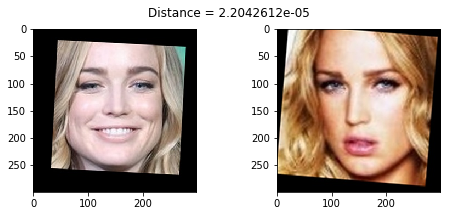

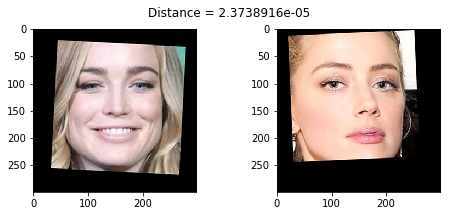

In [0]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle('Distance = '+str(distance(embeddings[idx1], embeddings[idx2])))
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 200)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
metadata

array([PINS/pins_Caity Lotz/Caity Lotz101.jpg,
       PINS/pins_Caity Lotz/Caity Lotz94.jpg,
       PINS/pins_Caity Lotz/Caity Lotz42.jpg, ...,
       PINS/pins_Jon Bernthal/Jon Bernthal48_2191.jpg,
       PINS/pins_Jon Bernthal/Jon Bernthal122_2182.jpg,
       PINS/pins_Jon Bernthal/Jon Bernthal190_2156.jpg], dtype=object)

In [0]:
train_idx = np.arange(metadata.shape[0]) % 9  != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#### Add your code here ####
X_train = embeddings[train_idx]
print(X_train.shape)

X_test = embeddings[test_idx]
print(X_test.shape)

(9573, 2622)
(1197, 2622)


In [0]:
X_train.shape

(9573, 2622)

In [0]:
np.arange(metadata.shape[0])

array([    0,     1,     2, ..., 10767, 10768, 10769])

In [0]:
np.arange(metadata.shape[0])

array([    0,     1,     2, ..., 10767, 10768, 10769])

In [0]:
print(test_idx.shape)

(10770,)


### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder

#### Add your code here ####
targets_var = []
for i in range(0,len(metadata)):
    targets_var.append(metadata[i].name.split('_')[1])
targets_var = np.array(targets_var)
print(targets_var.shape)
le = LabelEncoder()
targets_var = np.array(le.fit_transform(targets_var))
print(targets_var.shape)

(10770,)
(10770,)


### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [0]:
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scaler = StandardScaler()
X = np.array(scaler.fit_transform(embeddings))
print(X.shape)

(10770, 2622)


### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

In [0]:
from sklearn.decomposition import PCA

#### Add your code here ####
n_components = 1300
pca = PCA(n_components=n_components)
X = np.array(pca.fit_transform(X))
print(X.shape)

(10770, 1300)


### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [0]:
from sklearn.svm import SVC
from sklearn import metrics

#### Add your code here ####
X_train = X[train_idx]
print(X_train.shape)
y_train = targets_var[train_idx]
print(y_train.shape)

X_test = X[test_idx]
print(X_test.shape)
y_test = targets_var[test_idx]
print(y_test.shape)

gauSVC = SVC(kernel = 'linear')
gauSVC.fit(X_train,y_train)

y_pred = gauSVC.predict(X_test)

print(metrics.classification_report(y_test, y_pred))

(9573, 1300)
(9573,)
(1197, 1300)
(1197,)
              precision    recall  f1-score   support

           0       0.30      0.33      0.32         9
           1       0.71      0.45      0.56        11
           2       0.62      0.62      0.62        13
           3       0.67      0.50      0.57        12
           4       0.50      0.71      0.59         7
           5       0.33      0.44      0.38         9
           6       0.50      0.62      0.56         8
           7       0.08      0.07      0.07        14
           8       0.27      0.21      0.24        14
           9       0.31      0.44      0.36         9
          10       0.25      0.29      0.27        14
          11       0.18      0.33      0.24        12
          12       0.46      0.67      0.55         9
          13       0.00      0.00      0.00         9
          14       0.19      0.19      0.19        16
          15       0.50      0.60      0.55        15
          16       0.43      0.50      

### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

(224, 224, 3)
(1, 2622)


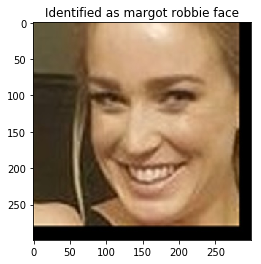

In [0]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

ex_img_path = metadata[test_idx][example_idx].image_path()

img = load_image(ex_img_path)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 

embedding_vector = np.array(generate_embedding(ex_img_path)).reshape((1,2622))
print(embedding_vector.shape)
scalar_tf = scaler.transform(embedding_vector)
pca_vec = pca.transform(scalar_tf)
example_prediction = gauSVC.predict(pca_vec)
example_identity = le.inverse_transform(example_prediction)[0]

plt.imshow(img)
plt.title('Identified as '+example_identity);